# Repaso y aplicaciones de Computación Gráfica

En esta clase repasaremos los conceptos claves de computación gráfica.

# Sección 1 - Imágenes y su Manipulación

Ejecutamos los siguientes comandos para obtener un conjunto de datos de imágenes


In [ ]:
!gdown 1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u

Downloading...
From: https://drive.google.com/uc?id=1vtZat_H7an2LtXKvo5WQbdXjyJaNdd_u
To: /content/Imagenes.zip
100% 30.8M/30.8M [00:00<00:00, 86.9MB/s]


In [ ]:
!unzip Imagenes.zip

Archive:  Imagenes.zip
  inflating: Imagenes/20191123_093200.jpg  
  inflating: Imagenes/Aviones.jpg    
  inflating: Imagenes/bird.png       
  inflating: Imagenes/cameraman.tif  
  inflating: Imagenes/centro1.jpg    
  inflating: Imagenes/centro2.png    
  inflating: Imagenes/claro.png      
  inflating: Imagenes/contrast1.jpg  
  inflating: Imagenes/contrast2.jpeg  
  inflating: Imagenes/contrast3.jpg  
  inflating: Imagenes/diagonalbars.png  
  inflating: Imagenes/digits.png     
  inflating: Imagenes/DSC_4141.JPG   
  inflating: Imagenes/DSC_4142.JPG   
  inflating: Imagenes/DSC_4143.JPG   
  inflating: Imagenes/DSC_4144.JPG   
  inflating: Imagenes/DSC_4145.JPG   
  inflating: Imagenes/DSC_4146.JPG   
  inflating: Imagenes/DSC_4147.JPG   
  inflating: Imagenes/eight.tif      
  inflating: Imagenes/filter.png     
  inflating: Imagenes/horizontalbars.png  
  inflating: Imagenes/ipad-min.jpeg  
  inflating: Imagenes/lima1.png      
  inflating: Imagenes/lima2.png      
  inflating:

Ahora debería existir un directorio llamado "Imagenes". El siguiente comando debería mostrarnos todas las imágenes del directorio

In [ ]:
!ls Imagenes/

20191123_093200.jpg  digits.png		 ipad-min.jpeg	pathology_cll20x01.jpg
Aviones.jpg	     DSC_4141.JPG	 lima1.png	pathology_cll40x03.jpg
bird.png	     DSC_4142.JPG	 lima2.png	pinguin.jpg
cameraman.tif	     DSC_4143.JPG	 lorito.jpg	placa.jpg
centro1.jpg	     DSC_4144.JPG	 mamografias	rice.png
centro2.png	     DSC_4145.JPG	 MarteC.jpeg	sine2.jpg
claro.png	     DSC_4146.JPG	 mdb97.png	sine3.jpg
contrast1.jpg	     DSC_4147.JPG	 moon.jpg	sine.jpg
contrast2.jpeg	     eight.tif		 noise1.jpg	skull.png
contrast3.jpg	     filter.png		 original.gif	xray.png
diagonalbars.png     horizontalbars.png  oscuro.png


Para la mayor parte del trabajo que realizaremos sobre las imágenes, usaremos la librería OpenCV que provee un catálogo inmenso de funciones para pocesamiento de imágenes, visión computacional y computación gráfica. Además usaremos Matplotlib para mostrar las imágenes.

In [ ]:
#Importar la libreria OpenCV
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np


Leemos una imagen y la mostramos

(366, 550, 3)


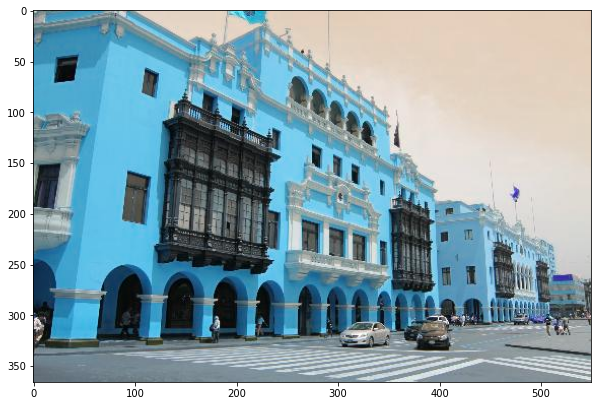

In [ ]:
img = cv2.imread('Imagenes/centro1.jpg') #Se lee una imagen

print(img.shape) #Imprime el tamaño de la imagen

plt.figure(figsize=(10,10)) #Se crea una figura con un tamaño determinado
plt.imshow(img) #Se dibuja una imagen
plt.show() # Se muestra el resultado

La imagen no se muestra como esperamos. Esto se debe a que OpenCV lee las imágenes a color en el orden BGR, es decir primero el canal azul, luego el canal  verde y finalmente el canal rojo. Cuando enviamos esta imagen a dibujar, Matplotlib cree que la imagen está en formato RGB. Para solucionar esto podemos hacer un cambio en los canales de color

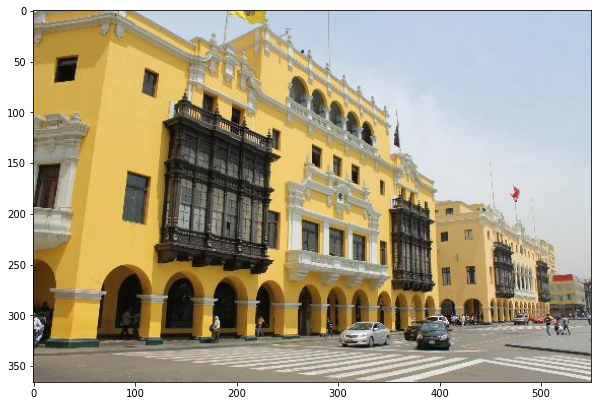

[183 143  56]


In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Forma 1
# img = img[:,:,[2, 1, 0]] #Forma 2
# img = img[:,:,::-1] #Forma 3

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

print(img[50,50,:])


**Cambio de Espacio de Color**

Por defecto las imágenes están en el espacio de color RGB. Sin embargo al momento de procesarlas, otros espacios de color pueden ser más útiles.

Por ejemplo, muchas de las técnicas clásicas de Computación Gráfica trabajan sobre imágenes en escalas de grises.

(366, 550)


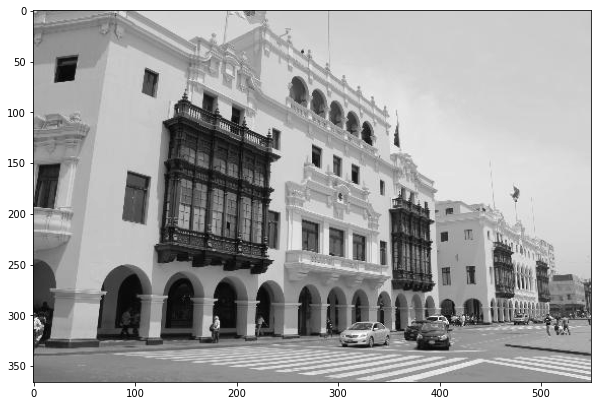

In [ ]:
#Convertir imagen a escala de grises
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#Alternativamente, uno puede leer la imagen como escala de grises así:
# imgGray = cv2.imread('Imagenes/centro1.jpg',0)

print(imgGray.shape)
plt.figure(figsize=(10,10))
plt.imshow(imgGray, cmap='gray')
plt.show()

Ahora utilizaremos el espacio de color HSV para seleccionar los pixeles de la imagen que tienen un color específico. Primero convertimos la imagen a HSV y calculamos cuál es el color HSV que queremos seleccionar

In [ ]:
#Convertimos imagen a espacio de color HSV
import numpy as np

imgHSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

amarillo = np.uint8([[[255, 255, 0]]])
amarilloHSV = cv2.cvtColor(amarillo, cv2.COLOR_RGB2HSV)

print(amarilloHSV)

[[[ 30 255 255]]]


Como vemos, hemos seleccionado el color amarilo (en RGB) y lo hemos convertido a HSV. Recuerda que el primer componente es la cromaticidad (30), el segundo componente es la saturación (255) y el tercer componente es la luminosidad (255).

Si nosotros queremos seleccionar el color amarillo en la imagen, neesitamos definir el mínimo y máximo amarillo en HSV. Esto es fácil solo basta con variar primero el Hue y definir los valores correctos de saturación para permitir amarillos más claros o oscuros.

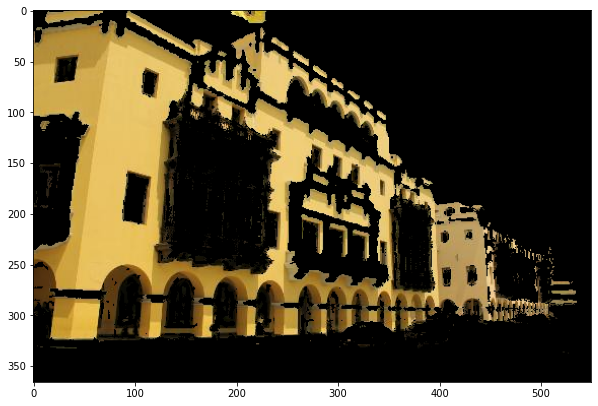

In [ ]:
lower_amarillo = np.array([15, 90, 0]) #minimo amarillo
upper_amarillo = np.array([40, 255, 255]) #maximo amarillo

#Buscamos todos los pixeles que estan entre el minimo y maximo amarillo
mask = cv2.inRange(imgHSV, lower_amarillo, upper_amarillo)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img, img, mask = mask)

plt.figure(figsize=(10,10))
plt.imshow(res)
plt.show()

**EJERCICIO 1**

En análisis de imágenes médicas, las imágenes de células sanguíneas en tejidos del estómago revelan la presencia de leucocitos atrofiados. Esta presencia indica una alta probabilidad de padecer de cáncer. Las células atrofiadas presentan un color azulado profundo que se diferencia del resto de células de la imagen. Utilizar análisis de espacio de colores para segmentar las células atrofiadas.

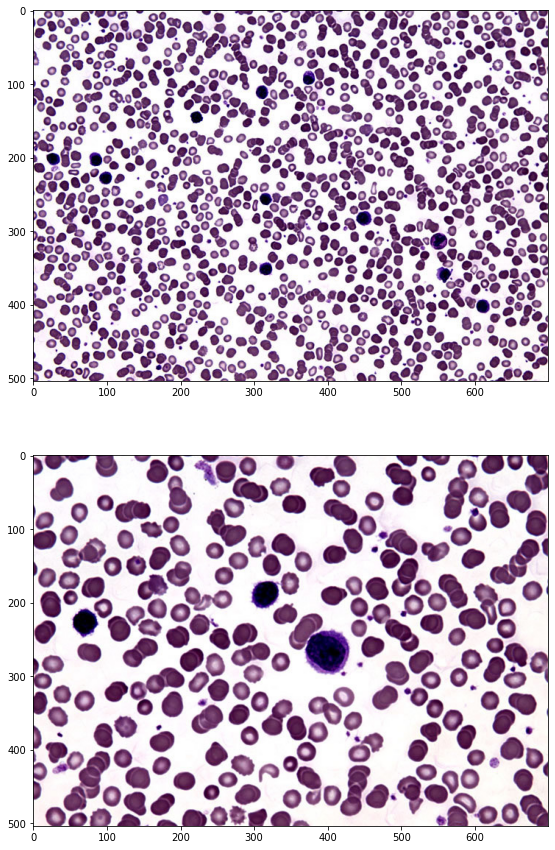

[ 0  0 28]


In [ ]:
img1 = cv2.imread('Imagenes/pathology_cll20x01.jpg')
img2 = cv2.imread('Imagenes/pathology_cll40x03.jpg')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

lower_azul = np.array([90, 245, 0]) #minimo amarillo
upper_azul = np.array([135, 255, 255]) #maximo amarillo

plt.figure(figsize=(15,15))
plt.subplot(2, 1, 1), plt.imshow(img1)
plt.subplot(2, 1, 2), plt.imshow(img2)
plt.show()

print(img2[270,400,:])

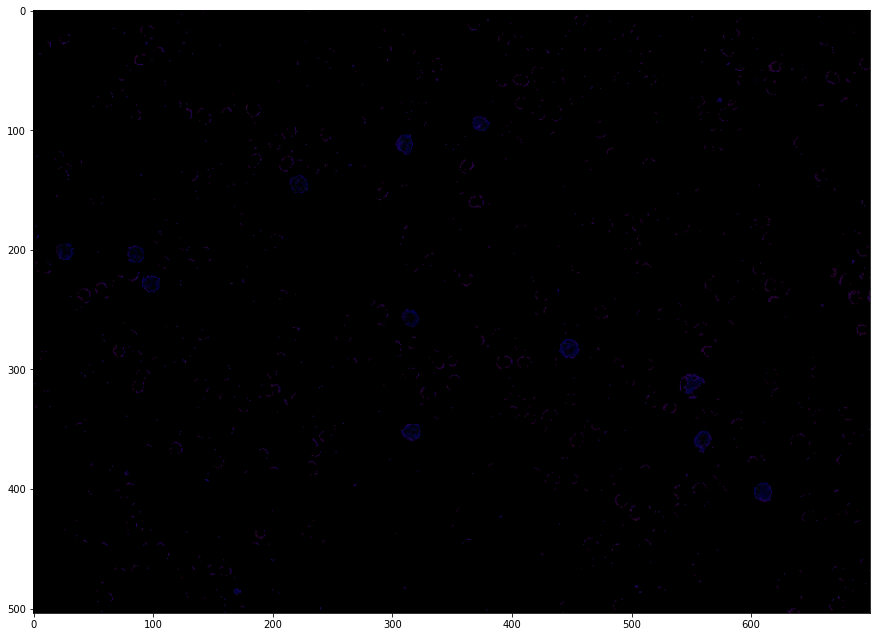

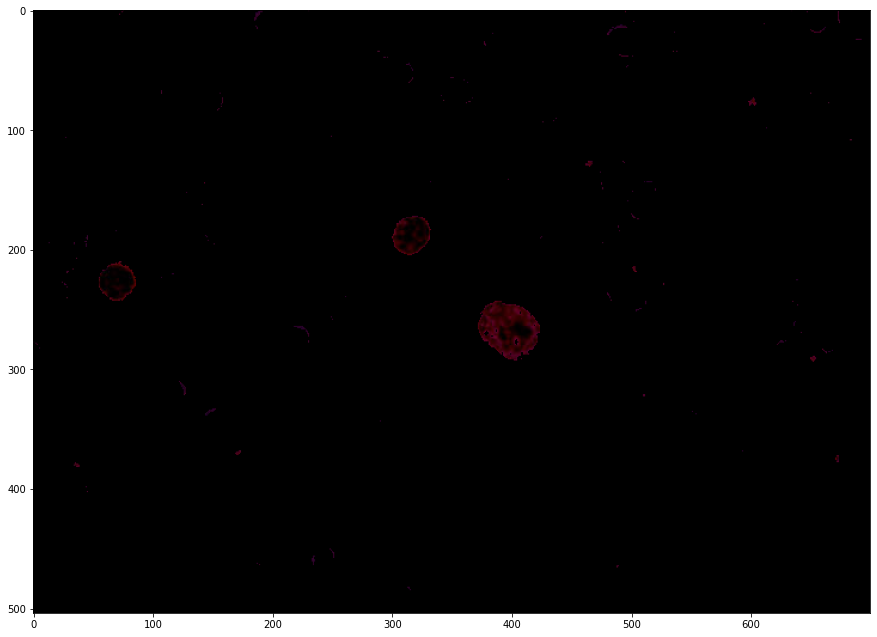

In [ ]:
lower_azul = np.array([0,0,0])
upper_azul = np.array([45,15,100])

#Buscamos todos los pixeles que estan entre el minimo y maximo azul
mask = cv2.inRange(img1, lower_azul, upper_azul)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res = cv2.bitwise_and(img1, img1, mask = mask)

plt.figure(figsize=(15,15))
plt.imshow(res)
plt.show()


#Buscamos todos los pixeles que estan entre el minimo y maximo azul
mask2 = cv2.inRange(img2, lower_azul, upper_azul)

#Obtenemos solo los pixeles que tienen las propiedades definidas
res2 = cv2.bitwise_and(img2, img2, mask = mask2)

plt.figure(figsize=(15,15))
plt.imshow(res2)
plt.show()

(180, 100, 3)


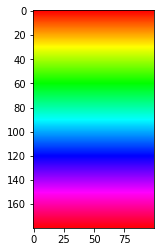

In [ ]:
img = np.zeros((180, 100, 3), np.uint8)

print(img.shape)
for i in range(0, 180):
  for j in range(0, 100):
    img[i,j,0] = i
    img[i,j,1] = 255
    img[i,j,2] = 255

imgRGB = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)

plt.imshow(imgRGB)
plt.show()

# 2.- Transformación de imágenes

Operaciones comunes en visión computacional son transformar las imágenes. Veamos como rotamos una imagen usando una matriz de transformación e
interpolación bilineal.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


(<matplotlib.axes._subplots.AxesSubplot at 0x7f6d26c949d0>,
 <matplotlib.image.AxesImage at 0x7f6d26d96450>)

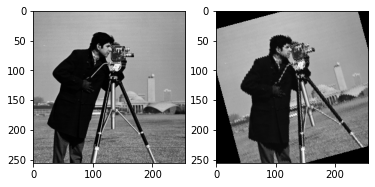

In [ ]:
def interpolar(I, coord):
    if coord[0] < 0 or coord[0] >(I.shape[1]-1) or coord[1] < 0 or coord[1] > (I.shape[0] - 1):
        return 0

    minx = math.floor(coord[0])
    maxx = math.ceil(coord[0])
    miny = math.floor(coord[1])
    maxy = math.ceil(coord[1])

    dx = coord[0] - minx
    dy = coord[1] - miny

    val1 = I[miny,minx]
    val2 = I[miny,maxx]
    val3 = I[maxy,maxx]
    val4 = I[maxy,minx]

    val11 = val1*(1-dx) + dx*val2
    val22 = val4*(1-dx) + dx*val3

    return val22*(1-dy) + dy*val11

def rotarImagen(I, centro, angulo, dim_salida):
    salida = np.zeros(dim_salida, dtype=np.uint8)
    angle = np.radians(angulo)

    T1 = np.array([[1.0, 0.0, -centro[0]],[0.0, 1.0, -centro[1]],[0.0, 0.0, 1.0]])
    T2 = np.array([[np.cos(angle), np.sin(angle), 0.0],[-np.sin(angle), np.cos(angle), 0.0],[0.0, 0.0, 1.0]])
    T3 = np.array([[1.0, 0.0, centro[0]],[0.0, 1.0, centro[1]],[0.0, 0.0, 1.0]])

    T = T3 @ T2 @ T1
    T = np.linalg.inv(T)

    #Iteramos sobre las posiciones de la salida
    for i in range(salida.shape[0]):
        for j in range(salida.shape[1]):
            coord = np.zeros((3,1), dtype=np.float)
            coord[0] = j
            coord[1] = i
            coord[2] = 1.0
            new_coord = T @ coord
            salida[i,j] = interpolar(I, new_coord)

    return salida

im = cv2.imread('Imagenes/cameraman.tif',0)

rows, cols = im.shape
im2 = rotarImagen(im, centro=(cols/2, rows/3), angulo=15, dim_salida=(rows, cols))

plt.figure()
plt.subplot(1,2,1), plt.imshow(im, cmap='gray')
plt.subplot(1,2,2), plt.imshow(im2, cmap='gray')